## Observations and Insights 

1. The drug treatment that's been used the most througout the study are Capomulin and Ramicane. Both male and female mice were used in the experiment almost equally. the amount of males exceed by only 1%.

2. There is a negative correlation between the timepoint and tumor volumes of mice treated with Capomulin. As the timepoint decreased, tumor volume increased. Whereas the the mice weight and average tumor volume has a high positive correlation of 0.84.

3. mice treated with Infubinol have the highest amount of final tumor volume out of the four drug regimens of interest.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_rows = pd.DataFrame(combined_df, columns= ["Mouse ID", "Timepoint"])
dup_rows[dup_rows.duplicated()]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_num = len(cleaned_df)
mice_num

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_tumor_df = pd.DataFrame(cleaned_df, columns= ["Drug Regimen", "Tumor Volume (mm3)"])
mean = drug_tumor_df["Tumor Volume (mm3)"].mean()
print(f"The mean is {mean}")

median = drug_tumor_df["Tumor Volume (mm3)"].median()
print(f"The median is {median}")

var = drug_tumor_df["Tumor Volume (mm3)"].var()
print(f"The variance is {var}")

std = drug_tumor_df["Tumor Volume (mm3)"].std()
print(f"The standard deviation is {std}")
sem = drug_tumor_df["Tumor Volume (mm3)"].sem()
print(f"The sem is {sem}")

The mean is 50.435293232255326
The median is 48.933453655
The variance is 79.46290714557298
The standard deviation is 8.914196943391648
The sem is 0.2055906218698623


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_var, "Standard Deviation": drug_std, "SEM": drug_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


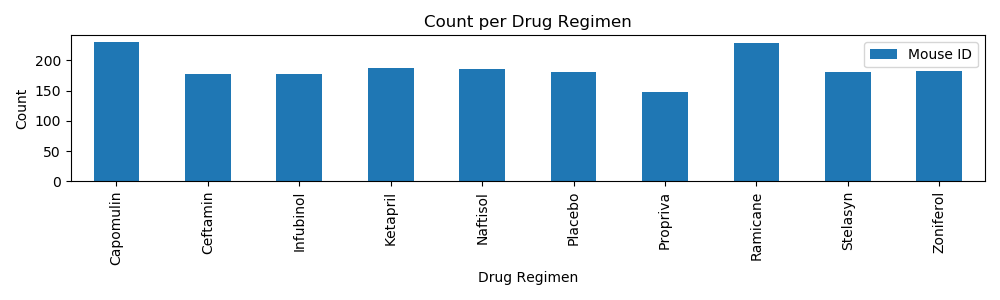

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

grouped_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"]).count()).reset_index()

regimen_data = grouped_df[["Drug Regimen","Mouse ID"]]


regimen_data = regimen_data.set_index("Drug Regimen")

regimen_data.plot(kind="bar", figsize=(10,3))


plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


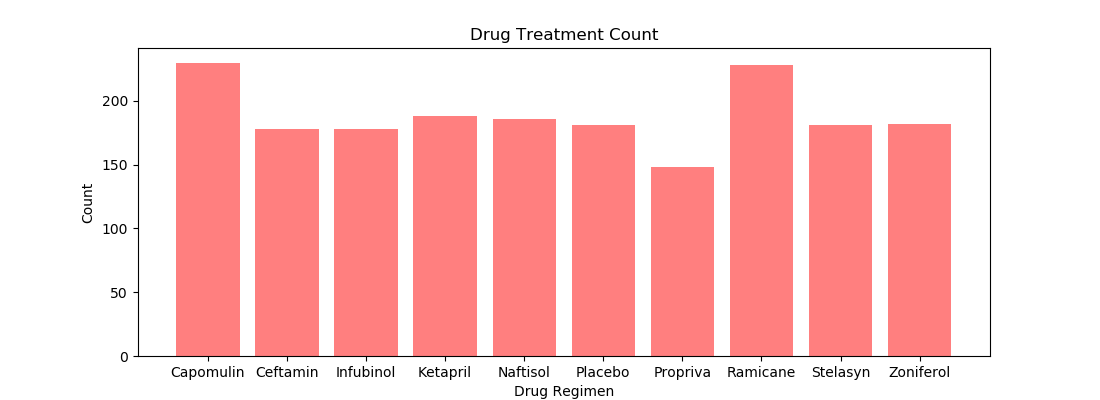

Text(0, 0.5, 'Count')

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_list = summary_df.index.tolist()

drug_count = (cleaned_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

<IPython.core.display.Javascript object>


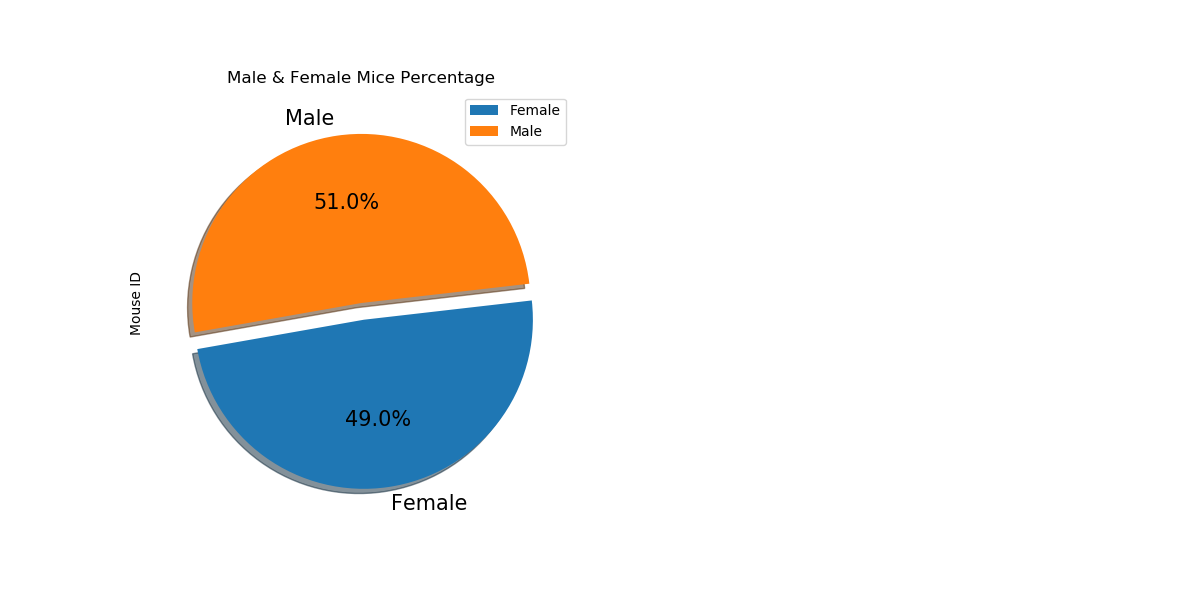

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(cleaned_df.groupby(["Sex"]).count()).reset_index()

gender_df = gender_df[["Sex","Mouse ID"]]

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
explode = (0.1, 0)
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = True, fontsize=15, explode = explode)

plt.title("Male & Female Mice Percentage")

plt.show()

<IPython.core.display.Javascript object>


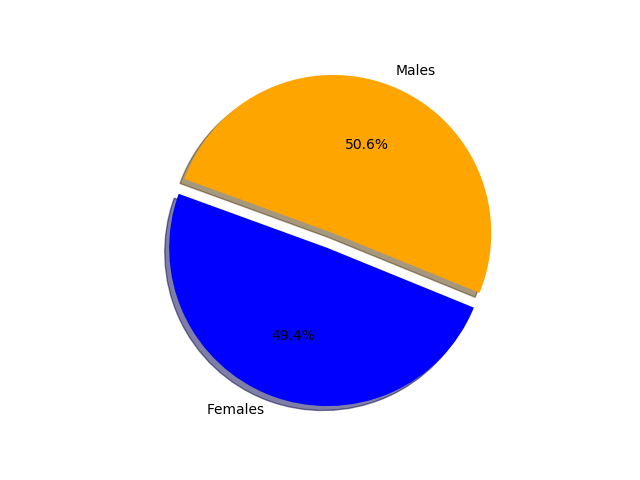

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count())

labels = ["Females", "Males"]
                
colors = ["blue", "orange"]
                
explode = (0.1, 0) 

plt.figure()              
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
                
plt.axis("equal")

plt.show()





## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cleaned_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

capo_drug = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_drug = capo_drug["Tumor Volume (mm3)"]

capo_drug.head()

0    23.343598
1    28.430964
2    28.484033
3    31.023923
4    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [68]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capo_drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")


# Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print (f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound}")
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Capomulin potential outliers could be values below 20.7 and above 51.83


In [69]:
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]


ram_drug = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_drug = ram_drug["Tumor Volume (mm3)"]

ram_drug.head()

0    22.050126
1    29.128472
2    30.276232
3    30.564625
4    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [71]:
quartiles = ram_drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range is: {iqr}")


# Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print (f"potential outliers could be values below {lower_bound} and above {upper_bound}")
    

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range is: 7.527130082499998
potential outliers could be values below 19.69 and above 49.8


In [72]:
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]


infu_drug = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_drug = infu_drug["Tumor Volume (mm3)"]

infu_drug.head()

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
Name: Tumor Volume (mm3), dtype: float64

In [73]:
quartiles = infu_drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range is: {iqr}")


# Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print (f"potential outliers could be values below {lower_bound} and above {upper_bound}")
    

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range is: 4.9311172099999965
potential outliers could be values below 55.36 and above 75.08


In [74]:
cefta_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]


cefta_drug = cefta_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cefta_drug = cefta_drug["Tumor Volume (mm3)"]

cefta_drug.head()

0    59.741901
1    59.851956
2    61.386660
3    61.433892
4    61.849023
Name: Tumor Volume (mm3), dtype: float64

In [75]:
quartiles = cefta_drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range is: {iqr}")


# Determine outliers using upper and lower bounds
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print (f"potential outliers could be values below {lower_bound} and above {upper_bound}")
    

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range is: 6.093590140000003
potential outliers could be values below 52.29 and above 76.67


<IPython.core.display.Javascript object>


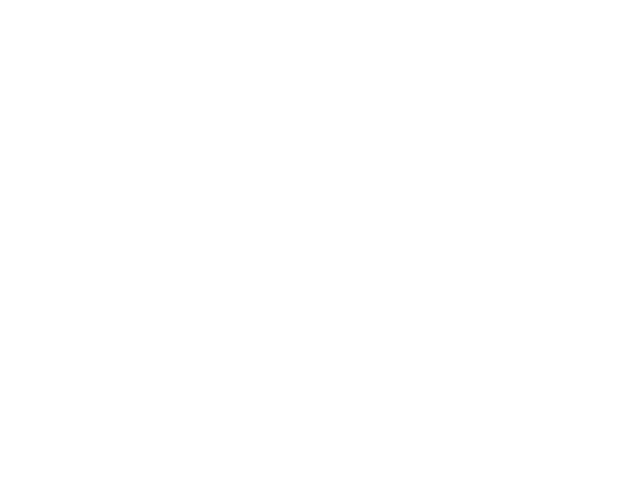

<IPython.core.display.Javascript object>


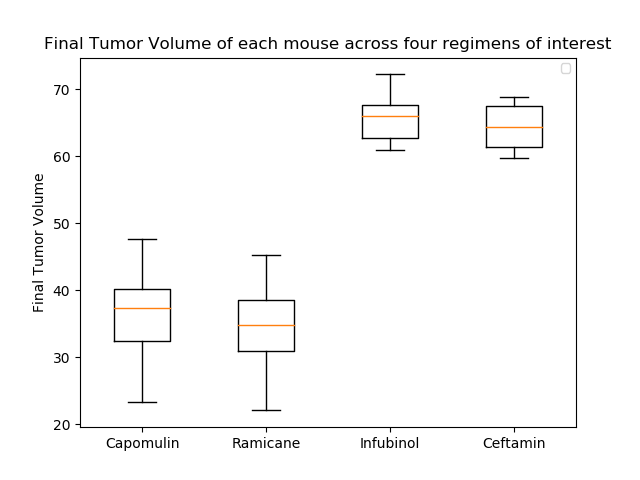

No handles with labels found to put in legend.


In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_data = [capo_drug, ram_drug, infu_drug, cefta_drug]

plt.figure()
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each mouse across four regimens of interest')
ax1.set_ylabel("Final Tumor Volume")


ax1.boxplot(drug_data , labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

ax1.legend(loc= "best", fontsize = "small", fancybox = True)

plt.show()

# Line and Scatter Plots

<IPython.core.display.Javascript object>


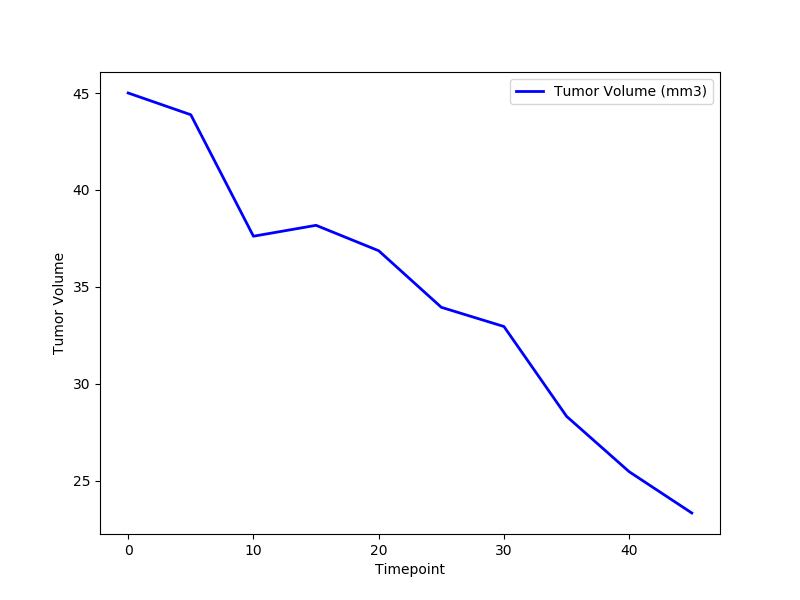

Text(0, 0.5, 'Tumor Volume')

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

capo_df = capo_df.reset_index()

capo_mouse = capo_df.loc[capo_df["Mouse ID"] == "s185"]

capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)

capo_mouse.set_index("Timepoint").plot(figsize=(8,6), linewidth=2, color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

<IPython.core.display.Javascript object>


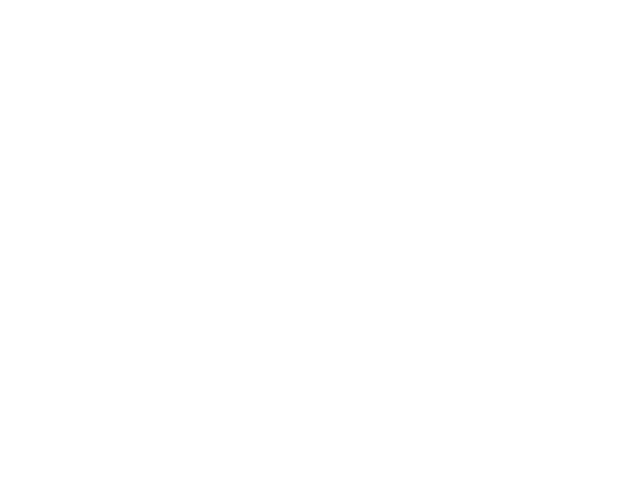

<IPython.core.display.Javascript object>


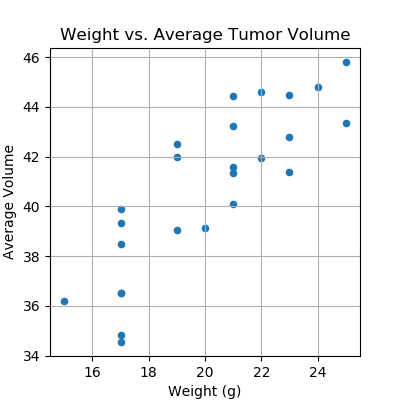

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = capo_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
plt.figure()
avg_capo.plot(kind="scatter", x= "Weight (g)"  , y= "Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")


plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,1]
avg_tumor_volume = avg_capo.iloc[:,2]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)

print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


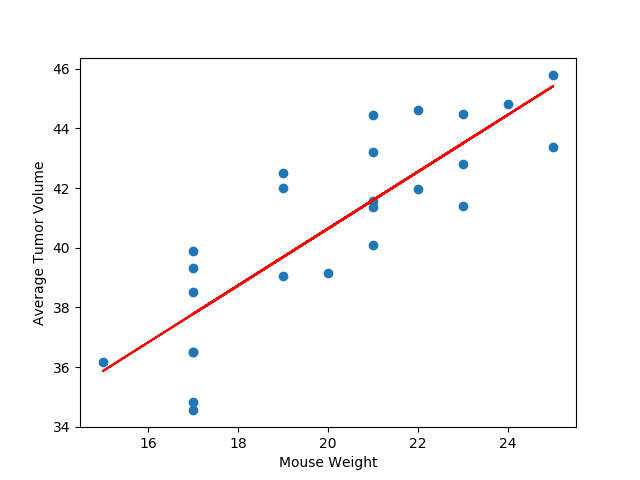

In [26]:
from scipy.stats import linregress

x_values = avg_capo["Weight (g)"]

y_values = avg_capo["Average Volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure()

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Mouse Weight")

plt.ylabel("Average Tumor Volume")

plt.show()